# **Word Counting for Natural Language Processing**

***

## Learning Goals
The purpose of this tutorial is to understand a simple NLP method: word counting and dictionary methods.

```
By the end of this tutorial, you will:

- Understand how to create a function to count keywords
- Understand how to generate sentiment distributions within a text

```

## Introduction
Word counting is a simple tool used in early NLP. It is always accurate, but may have a tendancy to overlook data and does not achieve the same insight as other models.

Keyword counting can be used to understand the useage of one (or a few) words in relation to the entire corpus of text. Additionally, it can be used as a base validity level to compare unsupervised and supervised models.

## **1. Environment Creation**

The libraries installed and imported in this tutorial are the datasets model, pandas, and the Natural Language Tool Kit.

*   The [Datasets model](https://pypi.org/project/datasets/) is an extension of [HuggingFace](https://huggingface.co/datasets), a platform popular when sharing and uploading data used in machine learning.  
*   [Pandas](https://pandas.pydata.org/) is used to structure the data
*   [NLTK](https://www.nltk.org/) is a common model to clean and interact with language data. It is composed of smaller libraries to help clean the text.
*   [Regex](https://docs.python.org/3/library/re.html) is used as an advanced text finder. This can help to clean and identify valid parts of the words. Here is my favorite Regex tester at [pythex.org](https://pythex.org/)


In [1]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
from datasets import load_dataset
import pandas as pd
import nltk
import regex as re

### **1.1 Data Importing**

The data used in this tutorial is provided by a HuggingFace data set by the user Krushil Patel titled [Covid Tweet Text Classification](https://huggingface.co/datasets/krushilpatel/covid-tweet-text-classification). This dataset consistes of 9,450 different tweets, and is labeled but has an unknown labeling schema (I believe it is to split between test and training data sets). There is little metadata about this data set, but it was selected because of its size and powerful emotions evoked during COVID-19.

In [3]:
  ## Using the dataset call to Hugging Face to import the dataframe into the notebook
ds = load_dataset("krushilpatel/covid-tweet-text-classification")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

validation.csv:   0%|          | 0.00/145k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8480 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1060 [00:00<?, ? examples/s]

In [4]:
''' EXAMINING THE DATASETS FEATURES '''

  ## Let's check the information  of the dataset.

print ("The type of the dataset is:",type(ds),"\n")

  ## And let's check what the keys are to access the information

print ("The keys of the dataset are:", ds.keys())

The type of the dataset is: <class 'datasets.dataset_dict.DatasetDict'> 

The keys of the dataset are: dict_keys(['train', 'validation'])


In [5]:
''' CONVERTING THE DATA INTO A DATAFRAME AND A LIST '''

data = pd.DataFrame(ds['train'])
data_list = data['tweet'].to_list()

In [6]:
''' Let's check to see what the values are in the data_list. If everything was imported correclty, there should be tweets printed out.'''

for tweet in data_list[0:5]:
  print (tweet)
  print ("\n")


9 aug 2020 till 10am 1480884  covid19 case recovered across india  covid19  covid  covid19  covid19  covid19india  covidupdates  coronavirus  coronaupdates  coronavirusindia  coronavirusupdates  coronaviruspandemic tcohpmmmgntef


nearly 60000 new case recorded india inching towards 24 lakh confirmed case soon supreme court panel recommended resumption physical hearing two three courtroom trial basis two week  covid19  coronavirus tco381ebfg6ho


 indiafightscorona  india hand 29 ventilator ppes 30000 hydroxychloroquine tablet amp protective equipment  guyana fight  covid19 indiainguyana  staysafe  indiawillwin tcoi7gtdpgj5r


 indiafightscorona round pushpin increasing number  covid19 testing lab india backhand index pointing down icmrdelhi  staysafe  indiawillwin tcodmpv4arry2


texas recently changed way count covid19 death also retroactively adjusts death count day death report date reported jurisdiction track blog post detail coming later week




## **2. Preprocessing Data**

An advantage of stemming when using dictionary methods is that is will capture all word forms.  It will treat the words 'cause', 'causing', and 'caused' all the same. In the data provided it will then change the original form of the word.

📌 Here is the [documentation](https://www.nltk.org/howto/stem.html) about the different kinds of stem algorithims available through the Natural Language Toolkit



In [7]:
''' Let's import the resources needed to STEM and clean the tweets.'''


  ## To call and instantiate the stopwords:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

  ## To call and instantiate the snowball stemmer ☃️
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english',ignore_stopwords=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### **2.1 Counting and Stemming**

The below code will take each individual tweet and create a list of stemmed words. This is assembling the 'bag of words' so to say, but storing the information in a dictionary with the frequencies as values.

In [8]:
''' WORD FREQUENCIES '''


## Instantiating our dictionary to count the words in
word_counter = {}


## Iterating through every tweet
for tweet in data_list:

  ## Identifying each word by splitting the tweet on blank or white spaces.
  words = tweet.split(" ")

  ## Iterating through each word and filtering out actual alphabetical characters using Regex
  for word in words:
    matches = re.findall('\D*',word)
    word = matches[0]

    ## Stemming the word using the porter stemmer
    stem = stemmer.stem(word)

    ## Counting the words
    ## First, checking if the word has already been counted in the dictionary, and if not creating a new value for it
    if len(stem) != 0:
      if stem not in word_counter.keys():
        word_counter[stem] = 1

      else:
          word_counter[stem] = word_counter[stem] + 1

## **3. Frequency Analysis**

This section of code will generate a dataframe with a breakdown of the frequency of words in the corpus. It will filter for the highest frequency words and then apply some calculations to it.

In [9]:
''' EXAMINING THE CREATED DICTIONARY '''

## First, let's see how many unique words are in the vocabulary

unique_words = len(word_counter.keys())
print ("The number of the unique words in the vocabulary is:",unique_words)

The number of the unique words in the vocabulary is: 14248


14,000 words would be a lot to visualize, especially if they do not occur frequently. The analysis could proceed in two ways - looking at the most frequent words or looking at the least frequent words. The most frequent would provide information about what was most relevant to the sampled population. Inversely, by analyzing words with few instances it can lead way to exploring silences and gaps within the dataset.

For this analysis, let's look at the words with the highest frequency words and then calculate their seniment. A few other calculations will be preformed to look at the composition of the sentiment.

In [10]:
''' CREATING A FILTERED WORD COUNTER '''

  ## Creating a storage dictionary for the words with the highest frequencies
filtered_word_counter = {}

## Iterating through every word and checking to see if there is over a certain amont of words
for key in word_counter.keys():
  if word_counter[key] > 10:  ## This can be changed based on any threshold. Setting this to 10 is an arbitrary decision.

    ## Checking to see if the word is not a stopword
    if key not in stopwords:

      ## Checking to see if the word has signficance
      if len(key) >2:
        filtered_word_counter[key] = word_counter[key]

In [11]:
## After fltering the dataset, let's see how many words were the most relevant according to the parameters set above

print ("The number of unique and filtered words in the vocabulary are:",(len(filtered_word_counter)))

The number of unique and filtered words in the vocabulary are: 1688


In [12]:
''' READING SOME OF THE WORDS '''

## We can look at the keys of the filtered word counter to see what the highest frequency words are.
## The output of keys is in order they were added to the dictionary, not the highest frequency.
filtered_word_counter.keys()

dict_keys(['aug', 'till', 'covid', 'case', 'recov', 'across', 'india', 'covidupd', 'coronavirus', 'coronaupd', 'coronavirusindia', 'coronavirusupd', 'coronaviruspandem', 'near', 'new', 'record', 'toward', 'lakh', 'confirm', 'soon', 'court', 'recommend', 'physic', 'hear', 'two', 'three', 'trial', 'basi', 'week', 'tco', 'indiafightscorona', 'hand', 'ventil', 'hydroxychloroquin', 'amp', 'protect', 'equip', 'fight', 'staysaf', 'indiawillwin', 'tcoi', 'round', 'pushpin', 'increas', 'number', 'test', 'lab', 'backhand', 'index', 'point', 'icmrdelhi', 'texa', 'recent', 'chang', 'way', 'count', 'death', 'also', 'adjust', 'day', 'report', 'date', 'track', 'post', 'detail', 'come', 'later', 'state', 'contribut', 'articl', 'virus', 'stay', 'said', 'univers', 'question', 'live', 'safe', 'lower', 'nation', 'use', 'follow', 'reveal', 'pub', 'sinc', 'reopen', 'tconyzlpjyfxm', 'say', 'rule', 'coupl', 'stop', 'much', 'realli', 'major', 'celebr', 'like', 'told', 'tcol', 'presid', 'barack', 'obama', 'sign

### **3.1 Structuring The Data**

To better manipulate the data, it is recommended to store in a dataframe. This is the best way to then create visualizations and do any other calculations when structured like this.

In [13]:
''' Creating the dataframe. '''
## To know what parameters are avaiable this can be further explored on the pandas documentation
## It requires some manipulation to ensure that the data is accurately represented.
filtered_words = pd.DataFrame(filtered_word_counter,index=['value']).transpose().reset_index().sort_values(by='value',ascending=False)

In [14]:
''' CREATING A COLUMN FOR PERCENTAGE '''

## Creating a value for how many instances of the words were present in the corpus
filtered_corpus_size = filtered_words['value'].agg('sum')

## Let's look to see what percentage of the corpus each word composes of. To do so, we can use a lambda function.
filtered_words['percentage'] = filtered_words['value'].apply(lambda x: x/filtered_corpus_size )

In [15]:
## Looking at the top ten words using Pandas head feature
filtered_words.head(10)

,index,value,percentage
2,covid,5257,0.046810
3,case,2659,0.023677
45,test,2224,0.019803
8,coronavirus,2188,0.019483
14,new,1457,0.012974
60,report,1376,0.012252
67,state,1229,0.010943
56,death,1058,0.009421
193,peopl,1025,0.009127
29,tco,938,0.008352


In [16]:
## Storing the list of words, in greatest to least order
words = filtered_words['index'].to_list()

### **3.2 Sentiment Analysis**

Using dictionary methods, we can easily conduct a sentiment analysis to see what percentage of the corpus belongs to a certain emotion. Unlike other NLP methods, the NLTK's sentiment analysis does actually 'read' the word and provides a score based on it. However, it does not 'read' the word in context when only a bag of words is passed to it.

In this section of code, the sentiment analyzer will be applied to the above tweets to expand the dataframe with its respective scores.

📌 The documentation for the [NLTK Vader Lexicon](https://www.nltk.org/_modules/nltk/sentiment/vader.html) can be found linked. It provides the source code for the original model.

In [17]:
''' DOWNLOADING THE VADER LEXICON AND SENTIMENT ANALYZER '''

nltk.download('vader_lexicon')
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [18]:
''' TESTING THE OUTPUT OF THE SENTIMENT ANALYZER '''

print (sia.polarity_scores('hate'))

''' Each word will have four scores - negative, neutral, positive, and compound. Compound is a representative score of both positive and negative inflections. ''';

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}


In [19]:
''' ANALYZING FOR SENTIMENT '''

## Creating a storage list for each end of the emotion scale
neg = []
neu = []
pos = []
compound = []

## Iterating through the words to generate a sentiment score
for word in words:
  sentiment = sia.polarity_scores(word)

  ## Storing the current scores in the lists
  curr_neg = sentiment['neg']
  curr_neu = sentiment['neu']
  curr_pos = sentiment['pos']
  curr_compound = sentiment['compound']

  neg.append(curr_neg)
  neu.append(curr_neu)
  pos.append(curr_pos)
  compound.append(curr_compound)

In [20]:
''' EXPANDING THE DATAFRAME '''

## Applying each of the lists to a new column in the dataframe
filtered_words['neg'] = neg
filtered_words['neu'] = neu
filtered_words['pos'] = pos
filtered_words['compound'] = compound

In [21]:
''' SORTING THE DATAFRAME '''

## Using the filtered_words dataframe to sort the values by compound, so the most positive words will occur first.
compound_sorted = filtered_words.sort_values(by='compound',ascending=False)
compound_sorted.head()

,index,value,percentage,neg,neu,pos,compound
544,best,56,0.000499,0.0,0.0,1.0,0.6369
1368,love,41,0.000365,0.0,0.0,1.0,0.6369
742,great,31,0.000276,0.0,0.0,1.0,0.6249
1163,success,40,0.000356,0.0,0.0,1.0,0.5719
1542,gain,11,0.000098,0.0,0.0,1.0,0.5267


**DataFrame Calculation**

Let's also add a dataframe that has the aggregate value for the percentage of the dataset. This is in an attempt to answer the question what percent of the dataframe was, positive, negative, or neutral?

In [22]:
neg_sum = filtered_words['neg'].agg('sum')
pos_sum = filtered_words['pos'].agg('sum')
neu_sum = filtered_words['neu'].agg('sum')
compound_sum = filtered_words['compound'].agg('sum')

In [23]:
## Seeing what is the value of words that have a negative, neutral, or positive score. All words will have a compound score
neg_query = filtered_words.query('neg != 0')
neg_value = neg_query['value'].agg('sum')
neg_perc = neg_value / filtered_corpus_size

pos_query = filtered_words.query('pos != 0')
pos_value = pos_query['value'].agg('sum')
pos_perc = pos_value / filtered_corpus_size

neu_query = filtered_words.query('neu != 0')
neu_value = neu_query['value'].agg('sum')
neu_perc = neu_value / filtered_corpus_size


In [24]:
## Assembling the calculations into a dataframe
calculations = {'neg freq':neg_value,'neg sia':neg_sum,'neg perc':neg_perc,
                'neu freq':neu_value,'neu sia':neu_sum,'neu perc':neu_perc,
                'pos freq':pos_value,'pos sia':pos_sum,'pos perc':pos_perc,}

In [25]:
sentiment_calculations = pd.DataFrame.from_dict(calculations,orient='index')

In [26]:
percentages = pd.DataFrame.from_dict({'neu perc':neu_perc,'pos perc':pos_perc,'neg perc':neg_perc},orient='index')

In [27]:
sentiment_calculations.head(10)

,0
neg freq,4211.000000
neg sia,77.000000
neg perc,0.037496
neu freq,103219.000000
neu sia,1534.000000
neu perc,0.919095
pos freq,4875.000000
pos sia,77.000000
pos perc,0.043409


## **4 Visualizing Sentiment Scores**

To visualize the sentiment scores any sort of graphing library can be used. The most common are [Seaborn](https://seaborn.pydata.org/) and [Plotly Express](https://plotly.com/python/plotly-express/). Seaborn is based in the library matplotlib, and so is good for complex statistical graphing. Plotly Express is a lighter-weight (but competitive) tool that creates interactive visualizations.

In [28]:
''' CREATING A VISUALIZATION ENVIRONMENT '''

import plotly.express as px
import seaborn as sb

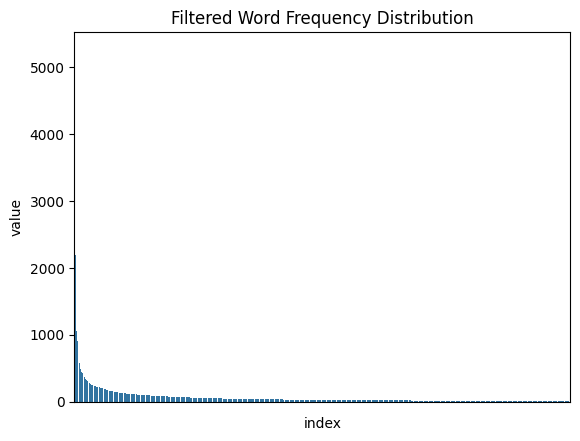

In [29]:
''' 1. WORD FREQUENCY DISTIRBUTION '''

ax = sb.barplot(filtered_words,x='index',y='value')
ax.set(title='Filtered Word Frequency Distribution')
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
ax;

In [30]:
''' 2. WHAT ARE THE MOST POSITVE WORDS? '''
fig = px.bar(compound_sorted.query('compound != 0'),x='index', y="compound",title = 'Highest Frequency COVID-19 Tweets: Compound Word Scores')
fig.show()

In [31]:
''' 3. WHAT IS THE PERCENTAGE OF EMOTION IN THE HIGHEST FREQUENCY WORDS? '''
fig = px.funnel(percentages, x=0,y=['neu perc','pos perc','neg perc'],title='Highest Frequency COVID-19 Tweets: Percentage of Sentiment')
fig

---

## About this Notebook

**Author:** Natalie Castro, University of Colorado at Boulder.  
**Updated On:** 2024-10-20

***